In [150]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Random Agent

In [151]:
df = pd.read_csv("Remora_0.00005/grace_goals.csv")
df['Time'] = 600 - df['Time']
df = df [df["SurveyedGoals(#)"] != 0]
df = df.drop_duplicates(["SurveyedGoals(#)", "index"], keep="last")
df["SurveyedGoals(#)"].unique()

array([1, 2, 3, 4])

In [152]:
result_df = None

def fun(x, interval=20, deadline=600):
    
    global result_df
    result = {
             "index": [],
             "Time":[],
             "SurveyedGoals(#)":[]}
    
    no_of_goals = 0
    for i in range(0,deadline,interval):
        rows = x[ (x["Time"] >= i) & (x["Time"] < (i+ interval))]
        if len(rows) > 0:
            no_of_goals = rows['SurveyedGoals(#)'].max()

        result["index"].append(x["index"].iloc[0])
        result["Time"].append(i+ interval)
        result["SurveyedGoals(#)"].append(no_of_goals)
        
        #print (pd.DataFrame.from_dict(result))
        
    if isinstance(result_df, pd.DataFrame):
        temp = pd.DataFrame.from_dict(result)
        result_df = result_df.append(temp)
    else:
        result_df =  pd.DataFrame.from_dict(result)

    return x
        
    
    
df.groupby("index")[['Time', 'SurveyedGoals(#)', "index"]].apply(lambda x : fun(x))
random_final_df = result_df.groupby(["Time"])['SurveyedGoals(#)'].agg("mean").reset_index()

# Smart Agent

In [153]:
df = pd.read_csv("Remora_smart_0.00005/grace_goals.csv")
df['Time'] = 600 - df['Time']
df = df [df["SurveyedGoals(#)"] != 0]
df = df.drop_duplicates(["SurveyedGoals(#)", "index"], keep="last")
df["SurveyedGoals(#)"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])

In [154]:
smart_result_df = None

def fun(x, interval=10, deadline=600):
    
    global smart_result_df
    result = {
             "index": [],
             "Time":[],
             "SurveyedGoals(#)":[]}
    
    no_of_goals = 0
    for i in range(0,deadline,interval):
        rows = x[ (x["Time"] >= i) & (x["Time"] < (i+ interval))]
        if len(rows) > 0:
            no_of_goals = rows['SurveyedGoals(#)'].max()

        result["index"].append(x["index"].iloc[0])
        result["Time"].append(i+ interval)
        result["SurveyedGoals(#)"].append(no_of_goals)
        
        #print (pd.DataFrame.from_dict(result))
        
    if isinstance(smart_result_df, pd.DataFrame):
        temp = pd.DataFrame.from_dict(result)
        smart_result_df = smart_result_df.append(temp)
    else:
        smart_result_df =  pd.DataFrame.from_dict(result)

    return x
        
    
    
df.groupby("index")[['Time', 'SurveyedGoals(#)', "index"]].apply(lambda x : fun(x))
smart_final_df = smart_result_df.groupby(["Time"])['SurveyedGoals(#)'].agg("mean").reset_index()
smart_result_df[smart_result_df['SurveyedGoals(#)'] > 25]

,index,Time,SurveyedGoals(#)


In [155]:
# Graphs

In [156]:
final_df = pd.merge(smart_final_df, random_final_df, how="inner", on="Time", suffixes = ["_smart", "_random"])

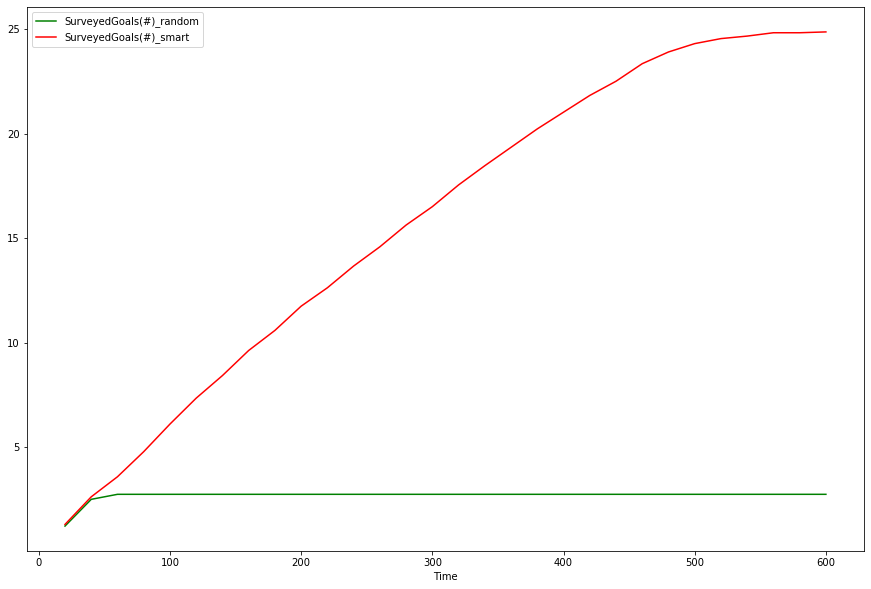

In [157]:
final_df.plot(x= "Time",y=["SurveyedGoals(#)_random","SurveyedGoals(#)_smart"], color=["green","red"], figsize=(15,10), rot=0)

In [158]:
final_df

,Time,SurveyedGoals(#)_smart,SurveyedGoals(#)_random
0,20,1.32,1.24
1,40,2.64,2.52
2,60,3.60,2.76
3,80,4.80,2.76
4,100,6.12,2.76
5,120,7.36,2.76
6,140,8.44,2.76
7,160,9.64,2.76
8,180,10.60,2.76
9,200,11.76,2.76
